## Download images

In [ ]:
import os
import requests
import csv

def download_images(image_data, output_dir='downloaded_images'):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    
    
    for id_num, url in image_data:
        try:
            # Skip empty or invalid URLs
            if not url or not url.startswith('http'):
                print(f"Skipping invalid URL for ID {id_num}: {url}")
                continue
            
            # Download the image
            response = requests.get(url, headers=headers, timeout=10)
            response.raise_for_status()  # Raise an exception for bad status codes
            
            # Save the image using the ID from the first column
            output_path = os.path.join(output_dir, f'image_{id_num}.jpg')
            with open(output_path, 'wb') as f:
                f.write(response.content)
            print(f"Downloaded image {id_num}: {url} -> {output_path}")
        
        except requests.exceptions.RequestException as e:
            print(f"Failed to download image {id_num}: {url} - Error: {str(e)}")
        except Exception as e:
            print(f"Unexpected error for image {id_num}: {url} - Error: {str(e)}")

def read_urls_from_csv(file_path):
    image_data = []
    with open(file_path, 'r', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if len(row) >= 2:  # Ensure there’s at least an ID and URL
                id_num = row[0].strip()  # Extract the ID from the first column
                url = row[1].strip()     # Extract the URL from the second column
                image_data.append((id_num, url))
    return image_data

def main():
    # Specify the CSV file path
    csv_file_path = 'movie_poster.csv'
    
    # Check if the file exists
    if not os.path.exists(csv_file_path):
        print(f"Error: CSV file '{csv_file_path}' not found.")
        return
    
    # Read IDs and URLs from the CSV file
    image_data = read_urls_from_csv(csv_file_path)
    if not image_data:
        print("No valid entries found in the CSV file.")
        return
    
    print(f"Found {len(image_data)} entries to process.")
    
    # Download all images
    download_images(image_data)

if __name__ == "__main__":
    main()

Found 1592 entries to process.
Downloaded image 1: https://images-na.ssl-images-amazon.com/images/M/MV5BMDU2ZWJlMjktMTRhMy00ZTA5LWEzNDgtYmNmZTEwZTViZWJkXkEyXkFqcGdeQXVyNDQ2OTk4MzI@..jpg -> downloaded_images\image_1.jpg
Failed to download image 2: https://images-na.ssl-images-amazon.com/images/M/MV5BMzk2OTg4MTk1NF5BMl5BanBnXkFtZTcwNjExNTgzNA@@..jpg - Error: 404 Client Error: Not Found for url: https://images-na.ssl-images-amazon.com/images/M/MV5BMzk2OTg4MTk1NF5BMl5BanBnXkFtZTcwNjExNTgzNA@@..jpg
Downloaded image 3: https://images-na.ssl-images-amazon.com/images/M/MV5BNDc3Y2YwMjUtYzlkMi00MTljLTg1ZGMtYzUwODljZTI1OTZjXkEyXkFqcGdeQXVyMTQxNzMzNDI@..jpg -> downloaded_images\image_3.jpg
Downloaded image 4: https://images-na.ssl-images-amazon.com/images/M/MV5BMjAwODYzNDY4Ml5BMl5BanBnXkFtZTcwODkwNTgzNA@@..jpg -> downloaded_images\image_4.jpg
Downloaded image 5: https://images-na.ssl-images-amazon.com/images/M/MV5BYWUwNDk2ZDYtNmFkMi00NjE5LWE1M2ItYTRkNTFjZDU3ZDU4L2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyMTYx

## Images left

In [42]:
import os
import re

def process_images_in_folder(image_folder):
    # Check if the folder exists
    if not os.path.exists(image_folder):
        print(f"Error: Folder '{image_folder}' not found.")
        return
    
    # List all files in the folder
    image_files = os.listdir(image_folder)
    
    # Filter out non-image files (you can adjust the extensions if needed)
    image_files = [f for f in image_files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    # print(len(image_files))

    if not image_files:
        print(f"No image files found in the folder '{image_folder}'.")
        return
    # print(f"Found {len(image_files)} image(s) to process.")

    image_numbers = []
    for image_file in image_files:
        try:
            match = re.search(r'_(\d+)\.', image_file)
            if match:
                image_numbers.append(int(match.group(1))) 
        except Exception as e:
            print(f"Unexpected error while processing image '{image_file}': {str(e)}")
    
    return image_numbers


image_folder = 'downloaded_images'  # Change this to your folder path
image_numbers = process_images_in_folder(image_folder)
print(len(image_numbers))
image_numbers = sorted(image_numbers)
print(image_numbers)
# Check differnt ones
all_image_nums = [i for i in range(1, 1683)]
images_left = [num for num in all_image_nums if num not in image_numbers]
print(len(image_numbers) + len(images_left) == len(all_image_nums))
print(f"Num images left {len(images_left)}")



1275
[1, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 24, 25, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 68, 69, 70, 71, 72, 73, 75, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 91, 93, 94, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 114, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 129, 130, 131, 132, 136, 137, 138, 140, 142, 143, 145, 146, 147, 149, 150, 152, 153, 154, 155, 156, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 178, 179, 181, 184, 186, 190, 191, 192, 193, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 206, 208, 209, 210, 213, 214, 215, 216, 217, 218, 219, 221, 222, 224, 226, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 244, 245, 246, 247, 248, 249, 250, 251, 252, 254, 256, 257, 258, 259, 261, 262, 264, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 278, 279, 281, 

## Retrieve images left -> scraping

In [21]:
import os
import requests
import csv
from bs4 import BeautifulSoup

def extract_poster_url(imdb_url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    try:
        response = requests.get(imdb_url, headers=headers, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Extract poster image URL from Open Graph meta tag
        poster = soup.find('meta', property='og:image')
        poster_url = poster['content'] if poster else None
        return poster_url
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch IMDb page {imdb_url}: {str(e)}")
        return None

def download_image(poster_url, movie_id, output_dir='downloaded_left_images_43'):
    if not poster_url:
        print(f"No poster URL for movie ID {movie_id}")
        return
    
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    try:
        response = requests.get(poster_url, headers=headers, timeout=10)
        response.raise_for_status()
        
        # Save the image using the movie ID
        output_path = os.path.join(output_dir, f'image_{movie_id}.jpg')
        with open(output_path, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded poster for movie ID {movie_id}: {poster_url} -> {output_path}")
    except requests.exceptions.RequestException as e:
        print(f"Failed to download poster for movie ID {movie_id}: {poster_url} - Error: {str(e)}")

def read_imdb_urls_from_csv(file_path, missing_ids):
    imdb_data = {}
    with open(file_path, 'r', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if len(row) >= 2:  # Ensure there’s at least an ID and URL
                movie_id = row[0].strip()  # First column: movie ID
                imdb_url = row[1].strip()  # Second column: IMDb URL
                # Only store if the ID is in the missing_ids list
                if movie_id in map(str, missing_ids):  # Convert missing_ids to strings for comparison
                    imdb_data[movie_id] = imdb_url
    return imdb_data

def main():
    # List of missing movie IDs
    missing_ids = image_ids_left  # Replace with your full list: [2, 6, ...]
    
    # CSV file with IMDb URLs
    csv_file_path = 'movie_url.csv'  # Adjust to your actual CSV file name
    
    # Check if the CSV file exists
    if not os.path.exists(csv_file_path):
        print(f"Error: CSV file '{csv_file_path}' not found.")
        return
    
    # Read IMDb URLs for the missing IDs
    imdb_data = read_imdb_urls_from_csv(csv_file_path, missing_ids)
    if not imdb_data:
        print("No matching IDs found in the CSV file.")
        return
    
    print(f"Processing {len(imdb_data)} movies from the missing IDs list.")
    
    # Extract and download posters
    for movie_id, imdb_url in imdb_data.items():
        print(f"Fetching poster for movie ID {movie_id}: {imdb_url}")
        poster_url = extract_poster_url(imdb_url)
        if poster_url:
            download_image(poster_url, movie_id)

if __name__ == "__main__":
    main()

Processing 43 movies from the missing IDs list.
Fetching poster for movie ID 6: https://www.imdb.com/es-es/title/tt0115012/
Downloaded poster for movie ID 6: https://m.media-amazon.com/images/M/MV5BMjExNzU2NDctYTQ4My00MmFkLTljN2UtN2MzYWQ1NTFiNDEyXkEyXkFqcGc@._V1_FMjpg_UX1000_.jpg -> downloaded_left_images_43\image_6.jpg
Fetching poster for movie ID 139: https://www.imdb.com/es-es/title/tt0064603/
Downloaded poster for movie ID 139: https://m.media-amazon.com/images/M/MV5BYTBiZDAwMDYtOGFhMy00Mzk3LThlZTktZTM1MzYxMWEzMDE4XkEyXkFqcGc@._V1_FMjpg_UX1000_.jpg -> downloaded_left_images_43\image_139.jpg
Fetching poster for movie ID 189: https://www.imdb.com/es/title/tt0104361/
Downloaded poster for movie ID 189: https://m.media-amazon.com/images/M/MV5BNmY3MDYwMDAtMmYwZS00NzZlLWIyMDAtYWYyMGQxZTdkYmJhXkEyXkFqcGc@._V1_FMjpg_UX1000_.jpg -> downloaded_left_images_43\image_189.jpg
Fetching poster for movie ID 243: https://www.imdb.com/es-es/title/tt0119432/
Downloaded poster for movie ID 243: https:/

# There are still 43 films missing

In [22]:
import os
import re
from bs4 import BeautifulSoup
def process_images_in_folder(image_folder):
    # Check if the folder exists
    if not os.path.exists(image_folder):
        print(f"Error: Folder '{image_folder}' not found.")
        return
    
    # List all files in the folder
    image_files = os.listdir(image_folder)
    
    # Filter out non-image files (you can adjust the extensions if needed)
    image_files = [f for f in image_files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    # print(len(image_files))

    if not image_files:
        print(f"No image files found in the folder '{image_folder}'.")
        return
    # print(f"Found {len(image_files)} image(s) to process.")

    image_numbers = []
    for image_file in image_files:
        try:
            match = re.search(r'_(\d+)\.', image_file)
            if match:
                image_numbers.append(int(match.group(1))) 
        except Exception as e:
            print(f"Unexpected error while processing image '{image_file}': {str(e)}")
    
    return image_numbers

In [18]:
# I'll store thir true IMDB in the 'movie_url.csv'
image_numbers1 = process_images_in_folder('downloaded_images')
print(len(image_numbers1))
image_numbers2 = process_images_in_folder('downloaded_left_images')
print(len(image_numbers2))

retrieved = len(image_numbers1) + len(image_numbers2)
print(f"Number of images retrieved: {retrieved}")
print(f"Images left: {1682 - retrieved}")

# Get the IDs of the images left
image_numbers_ids1 = process_images_in_folder('downloaded_images')
image_numbers_ids1 = sorted(image_numbers_ids1)
print(len(image_numbers_ids1), image_numbers_ids1)

image_numbers_ids2 = process_images_in_folder('downloaded_left_images')
image_numbers_ids2 = sorted(image_numbers_ids2)
print(len(image_numbers_ids2), image_numbers_ids2)

all_image_nums = [i for i in range(1, 1683)]
image_ids_left = [num for num in all_image_nums if num not in image_numbers_ids1 and num not in image_numbers_ids2]
print(f"Number of images left: {len(image_ids_left)}, IDs of images left: {image_ids_left}")
# I'll store thir true IMDB in the 'movie_url.csv'

1275
364
Number of images retrieved: 1639
Images left: 43
1275 [1, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 24, 25, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 68, 69, 70, 71, 72, 73, 75, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 91, 93, 94, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 114, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 129, 130, 131, 132, 136, 137, 138, 140, 142, 143, 145, 146, 147, 149, 150, 152, 153, 154, 155, 156, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 178, 179, 181, 184, 186, 190, 191, 192, 193, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 206, 208, 209, 210, 213, 214, 215, 216, 217, 218, 219, 221, 222, 224, 226, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 244, 245, 246, 247, 248, 249, 250, 251, 252, 254, 256, 257, 258, 259, 261, 262, 264, 266, 267, 26

In [16]:
ids = []
with open('movie_url.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        if len(row) >= 2:  # Ensure there’s at least an ID and URL
            movie_id = row[0].strip()  # First column: movie ID
            ids.append(int(movie_id))

print(len(ids), len(set(ids)), ids)

from collections import Counter

counts = Counter(ids)

duplicates = [item for item, count in counts.items() if count > 1]

print("Duplicates:", duplicates)


1682 1682 [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 

## I have loaded the last 43, check it, I should have all the images

In [34]:
image_numbers3 = process_images_in_folder('downloaded_left_images_43')
print(len(image_numbers3))

# Final check:
print(len(image_numbers1) + len(image_numbers2) + len(image_numbers3) == 1682)

# Double check with the folder that contains all the movies:
image_files = os.listdir('1682_images')
# Filter out non-image files (you can adjust the extensions if needed)
image_files = [f for f in image_files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print(len(image_files) == 1682)
image_IDs = []
for image_file in image_files:
    try:
        match = re.search(r'_(\d+)\.', image_file)
        if match:
            image_IDs.append(int(match.group(1))) 
    except Exception as e:
        print(f"Unexpected error while processing image '{image_file}': {str(e)}")
    
image_IDs = sorted(image_IDs)
if image_IDs == all_image_nums:
    print('I HAVE ALL THE POSTERS! READY FOR ViT') # I have them all

43
True
True
I HAVE ALL THE POSTERS! READY FOR ViT


## Just for the director

In [36]:
import requests
from bs4 import BeautifulSoup

def extract_director(imdb_url):
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(imdb_url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extract director
    director_tag = soup.find('a', href=lambda x: x and 'tt_ov_dr' in x)
    director = director_tag.text if director_tag else "Not found"
    
    return director

url = "https://www.imdb.com/es-es/title/tt0100840/"
director = extract_director(url)
print(f"Director: {director}")

Director: Nicole Garcia


## Retrieve the director

In [39]:
import os
import requests
import csv
from bs4 import BeautifulSoup

def extract_director(imdb_url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    try:
        response = requests.get(imdb_url, headers=headers, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Extract director from the credits section
        director_tag = soup.find('a', href=lambda x: x and 'tt_ov_dr' in x)
        director = director_tag.text.strip() if director_tag else "Not found"
        return director
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch {imdb_url}: {str(e)}")
        return "Not found"

def read_imdb_urls_from_csv(file_path):
    imdb_data = []
    with open(file_path, 'r', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if len(row) >= 2:  # Ensure there’s at least an ID and URL
                movie_id = row[0].strip()  # First column: movie ID
                imdb_url = row[1].strip()  # Second column: IMDb URL
                imdb_data.append((movie_id, imdb_url))
    return imdb_data

def write_directors_to_csv(output_file, director_data):
    with open(output_file, 'w', encoding='utf-8', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['id', 'director'])  # Header row
        for movie_id, director in director_data:
            writer.writerow([movie_id, director])

def main():
    # Input CSV file with IMDb URLs
    input_csv_path = 'movie_url.csv'  # Adjust to your actual file name
    
    # Output CSV file for directors
    output_csv_path = 'movie_directors.csv'
    
    # Check if the input CSV exists
    if not os.path.exists(input_csv_path):
        print(f"Error: Input CSV file '{input_csv_path}' not found.")
        return
    
    # Read all IMDb URLs from the input CSV
    imdb_data = read_imdb_urls_from_csv(input_csv_path)
    if not imdb_data:
        print("No valid entries found in the input CSV.")
        return
    
    print(f"Processing {len(imdb_data)} movies.")
    
    # Scrape directors and store results
    director_data = []
    for movie_id, imdb_url in imdb_data:
        print(f"Scraping director for movie ID {movie_id}")
        director = extract_director(imdb_url)
        director_data.append((movie_id, director))
    
    # Write results to output CSV
    write_directors_to_csv(output_csv_path, director_data)
    print(f"Directors saved to '{output_csv_path}'.")

if __name__ == "__main__":
    main()

Processing 1682 movies.
Scraping director for movie ID 1
Scraping director for movie ID 2
Scraping director for movie ID 3
Scraping director for movie ID 4
Scraping director for movie ID 5
Scraping director for movie ID 7
Scraping director for movie ID 8
Scraping director for movie ID 9
Scraping director for movie ID 10
Scraping director for movie ID 11
Scraping director for movie ID 12
Scraping director for movie ID 13
Scraping director for movie ID 14
Scraping director for movie ID 15
Scraping director for movie ID 16
Scraping director for movie ID 17
Scraping director for movie ID 18
Scraping director for movie ID 19
Scraping director for movie ID 20
Scraping director for movie ID 21
Scraping director for movie ID 22
Scraping director for movie ID 23
Scraping director for movie ID 24
Scraping director for movie ID 25
Scraping director for movie ID 26
Scraping director for movie ID 27
Scraping director for movie ID 28
Scraping director for movie ID 29
Scraping director for movie ID 3

## Check the scrapped dierctors

In [19]:
director_mv_id = []
count_not_found = 0
with open('movie_directors.csv', 'r') as f:
    lines = f.readlines()
    for line in lines:
        mv_id, director = line.split(',')
        director = director.strip()
        director_mv_id.append(int(mv_id))
        if director == 'Not found':
            count_not_found += 1

director_mv_id = sorted(director_mv_id)
print(len(director_mv_id))

# How many were not found
print(f"{count_not_found} directors were not found")

1682
60 directors were not found


## Vision transformer 

In [ ]:
import torch
from torchvision import transforms, models
from PIL import Image
import os
import matplotlib.pyplot as plt

def load_and_convert_images(image_dir='downloaded_images'):
    # Define a transform to prepare images for ViT
    # ViT expects 224x224 images and specific normalization
    transform = transforms.Compose([
        transforms.Resize((224, 224), interpolation=transforms.InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
    ])
    
    # List to store tensors
    image_tensors = []
    
    # Get all image files
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    
    # Process each image
    for i, img_file in enumerate(image_files[:5], 1):  # Limit to first 5
        try:
            # Open image
            img_path = os.path.join(image_dir, img_file)
            image = Image.open(img_path).convert('RGB')  # Ensure RGB format
            
            # Convert to tensor
            tensor = transform(image)
            
            # Add to list
            image_tensors.append(tensor)
            
            # Print shape and basic info
            print(f"Image {i} ({img_file}):")
            print(f"Shape: {tensor.shape}")  # [C, H, W] format
            print(f"Data type: {tensor.dtype}")
            print(f"Min value: {tensor.min():.4f}")
            print(f"Max value: {tensor.max():.4f}\n")
            
        except Exception as e:
            print(f"Error processing {img_file}: {str(e)}")
    
    return image_tensors

def get_vit_embeddings(batch_tensor, device):
    vit = models.vit_b_16(pretrained=True).to(device)
    vit.eval()
    
    with torch.no_grad():
        # Access the encoder output
        x = vit._process_input(batch_tensor)  # Patchify and add position embeddings
        cls_token = vit.class_token.expand(batch_tensor.shape[0], -1, -1)  # [N, 1, 768]
        x = torch.cat((cls_token, x), dim=1)  # [N, 197, 768]
        embeddings = vit.encoder(x)[:, 0]  # Take [CLS] token, [N, 768]
    
    return embeddings

def main():
    # Check if CUDA is available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # Convert images to tensors
    tensors = load_and_convert_images()
    
    if tensors:
        # Stack tensors into a batch
        batch_tensor = torch.stack(tensors)
        print(f"Batch tensor shape: {batch_tensor.shape}")  # [N, C, H, W]
        
        # Move to device
        batch_tensor = batch_tensor.to(device)
        print(f"Batch tensor moved to: {batch_tensor.device}")
        
        # Get ViT embeddings
        embeddings = get_vit_embeddings(batch_tensor, device)
        print(f"Embeddings shape: {embeddings.shape}")  # [N, 1000] for ImageNet classes
        print(f"Embeddings sample: {embeddings[0]}")  
        
        # Optional: Display some images
        fig, axes = plt.subplots(1, 4, figsize=(12, 8))
        for i in range(min(4, len(tensors))):  # Show up to 4 images
            img = batch_tensor[i].cpu()  # Move to CPU for plotting
            img = img.permute(1, 2, 0)  # [C, H, W] -> [H, W, C]
            # Denormalize for visualization
            img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
            img = torch.clamp(img, 0, 1)
            axes[i].imshow(img)
            axes[i].axis("off")
        plt.show()
    
    return tensors, embeddings

if __name__ == "__main__":
    tensors, embeddings = main()

In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image

# Step 1: Load a pretrained ResNet model (you can also choose other models like VGG, DenseNet, etc.)
model = models.resnet50(pretrained=True)
model.eval()  # Set the model to evaluation mode (important for inference)

# Step 2: Define the image transformation (resize, normalize, and convert to tensor)
# transform = transforms.Compose([
#     transforms.Resize(256),  # Resize image to 256x256
#     transforms.CenterCrop(224),  # Crop the center 224x224 region
#     transforms.ToTensor(),  # Convert the image to a tensor
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize as per ResNet requirements
# ])

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet expects 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet stats
])

# Step 3: Load the image and apply the transformation
img_path = 'image_1.jpg'  # Path to your movie poster image
img = Image.open(img_path)
img_tensor = transform(img).unsqueeze(0)  # Add a batch dimension (1 image in the batch)

# Step 4: Pass the image through the model to extract features
with torch.no_grad():  # Turn off gradients since we don't need them during inference
    features = model(img_tensor)

# Step 5: features is the output of the model, which you can use as a representation
print(features.shape)  # This will be a 1000-dimensional vector (for ResNet18, 1000 classes in ImageNet)

# If you want a feature vector before the final classification layer, you can modify the model:
# This extracts features from the penultimate layer (just before the final fully connected layer)
model_ft = torch.nn.Sequential(*list(model.children())[:-1])  # Remove the last classification layer
with torch.no_grad():
    feature_vector = model_ft(img_tensor).view(-1)  # Flatten the features to a 1D vector

print(feature_vector.shape)  # This will give you a 512-dimensional vector (for ResNet18)
feature_vector

torch.Size([1, 1000])
torch.Size([2048])


tensor([0.0743, 0.4612, 0.1780,  ..., 0.2624, 0.5750, 0.0155])

In [11]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import os
import numpy as np

# Load pretrained ResNet-50
model = models.resnet50(pretrained=True)
model.eval()  # Set to evaluation mode
model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove the final classification layer

# Image preprocessing
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet expects 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet stats
])

def extract_features(image_path):
    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')
    image_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension
    
    # Extract features
    with torch.no_grad():
        features = model(image_tensor)
    return features.squeeze().numpy()  # Flatten to 2048-dimensional vector

# Directory with your posters
poster_dir = '1682_images'
feature_dict = {}

# Process all posters
for filename in os.listdir(poster_dir):
    if filename.endswith('.jpg'):
        movie_id = filename.split('_')[1].split('.')[0]  # Extract ID from 'image_1536.jpg'
        image_path = os.path.join(poster_dir, filename)
        features = extract_features(image_path)
        feature_dict[movie_id] = features
        print(f"Movie ID {movie_id} embedding done!")

# extracted_img1 = extract_features('image_1.jpg')
# print(extracted_img1)

# Save features to a file (e.g., numpy array or CSV)
np.save('movie_poster_features.npy', feature_dict)

c:\Users\apala\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\apala\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Movie ID 1 embedding done!
Embeddings stored
Movie ID 10 embedding done!
Embeddings stored
Movie ID 100 embedding done!
Embeddings stored
Movie ID 1000 embedding done!
Embeddings stored
Movie ID 1001 embedding done!
Embeddings stored
Movie ID 1002 embedding done!
Embeddings stored
Movie ID 1003 embedding done!
Embeddings stored
Movie ID 1004 embedding done!
Embeddings stored
Movie ID 1005 embedding done!
Embeddings stored
Movie ID 1006 embedding done!
Embeddings stored
Movie ID 1007 embedding done!
Embeddings stored
Movie ID 1008 embedding done!
Embeddings stored
Movie ID 1009 embedding done!
Embeddings stored
Movie ID 101 embedding done!
Embeddings stored
Movie ID 1010 embedding done!
Embeddings stored
Movie ID 1011 embedding done!
Embeddings stored
Movie ID 1012 embedding done!
Embeddings stored
Movie ID 1013 embedding done!
Embeddings stored
Movie ID 1014 embedding done!
Embeddings stored
Movie ID 1015 embedding done!
Embeddings stored
Movie ID 1016 embedding done!
Embeddings stored

## Check that I have all the embeddings:

In [14]:
import numpy as np

# Load the embeddings
embeddings_dict = np.load('movie_poster_features.npy', allow_pickle=True)

# Debug the loaded object
print("Type:", type(embeddings_dict))
print("Shape:", embeddings_dict.shape)  # Should be () for 0D or (1,) for 1D
print("Content:", embeddings_dict)  # Show the raw content

Type: <class 'numpy.ndarray'>
Shape: ()
Content: {'1': array([0.07427696, 0.46123806, 0.17797025, ..., 0.26238805, 0.5749884 ,
       0.01548037], dtype=float32), '10': array([0.6793789 , 2.7548933 , 0.74095213, ..., 0.7296628 , 0.14906879,
       0.12317032], dtype=float32), '100': array([1.0114646 , 2.8426485 , 0.29699165, ..., 0.42048967, 0.2046749 ,
       0.31224084], dtype=float32), '1000': array([0.22160168, 2.63911   , 0.19816054, ..., 0.17083052, 0.07641007,
       0.21754651], dtype=float32), '1001': array([0.26895228, 1.4922553 , 0.05919752, ..., 0.        , 0.2808254 ,
       0.13063805], dtype=float32), '1002': array([0.19056275, 1.0634109 , 0.26602754, ..., 0.09496476, 0.09021407,
       0.3426678 ], dtype=float32), '1003': array([0.08627294, 0.98160607, 0.63729197, ..., 0.33814457, 0.1467964 ,
       0.3055426 ], dtype=float32), '1004': array([0.10645676, 2.6704154 , 0.13696338, ..., 0.6481527 , 0.04404934,
       0.06564964], dtype=float32), '1005': array([0.9870164 , 1

In [2]:
import numpy as np

# Load the embeddings
embeddings_dict = np.load('movie_poster_features.npy', allow_pickle=True)

# Extract the dictionary from the 0D array
embeddings_dict = embeddings_dict.item()  # Convert 0D array to its contained object
# Verify it's a dictionary
print("Type:", type(embeddings_dict))  
print(f"Total movies: {len(embeddings_dict)}")  

# Access a specific embedding
movie_id = '1'
if movie_id in embeddings_dict:
    embedding = embeddings_dict[movie_id]
    print(f"Embedding for movie ID {movie_id}: {embedding.shape}")
    print(embedding[:10])
else:
    print(f"Movie ID {movie_id} not found.")

Type: <class 'dict'>
Total movies: 1682
Embedding for movie ID 1: (2048,)
[0.07427696 0.46123806 0.17797025 0.09867579 1.3386037  0.39324567
 0.27847078 0.15632434 0.25948012 0.33348584]


In [3]:
for movie_id in ['1', '10', '100', '1536']:
    if movie_id in embeddings_dict:
        embedding = embeddings_dict[movie_id]
        print(f"Movie ID {movie_id}: Shape {embedding.shape}, First 5 values: {embedding[:5]}")

from sklearn.cluster import KMeans
embeddings = np.array(list(embeddings_dict.values()))
kmeans = KMeans(n_clusters=5)  # Adjust number of clusters
clusters = kmeans.fit_predict(embeddings)
for movie_id, cluster in zip(embeddings_dict.keys(), clusters):
    print(f"Movie ID {movie_id} -> Cluster {cluster}")

from sklearn.metrics.pairwise import cosine_similarity
embeddings = np.array(list(embeddings_dict.values()))
movie_ids = list(embeddings_dict.keys())
sim_matrix = cosine_similarity(embeddings)
# Find top 5 similar movies to ID '1'
idx = movie_ids.index('1')
similar_indices = sim_matrix[idx].argsort()[-6:-1][::-1]  # Top 5 excluding itself
print("Similar to movie ID 1:", [movie_ids[i] for i in similar_indices])

Movie ID 1: Shape (2048,), First 5 values: [0.07427696 0.46123806 0.17797025 0.09867579 1.3386037 ]
Movie ID 10: Shape (2048,), First 5 values: [0.6793789  2.7548933  0.74095213 1.011367   0.51233804]
Movie ID 100: Shape (2048,), First 5 values: [1.0114646  2.8426485  0.29699165 0.2709052  0.12914997]
Movie ID 1536: Shape (2048,), First 5 values: [0.2563295 3.4352689 1.2387842 0.537924  1.5597448]
Movie ID 1 -> Cluster 3
Movie ID 10 -> Cluster 4
Movie ID 100 -> Cluster 3
Movie ID 1000 -> Cluster 0
Movie ID 1001 -> Cluster 3
Movie ID 1002 -> Cluster 2
Movie ID 1003 -> Cluster 3
Movie ID 1004 -> Cluster 3
Movie ID 1005 -> Cluster 4
Movie ID 1006 -> Cluster 4
Movie ID 1007 -> Cluster 0
Movie ID 1008 -> Cluster 0
Movie ID 1009 -> Cluster 1
Movie ID 101 -> Cluster 0
Movie ID 1010 -> Cluster 0
Movie ID 1011 -> Cluster 4
Movie ID 1012 -> Cluster 0
Movie ID 1013 -> Cluster 4
Movie ID 1014 -> Cluster 1
Movie ID 1015 -> Cluster 0
Movie ID 1016 -> Cluster 4
Movie ID 1017 -> Cluster 0
Movie ID 101

Embeddings array shape: (1682, 2048)

Explained Variance Ratio per Component:
Component 1: 0.0602
Component 2: 0.0380
Component 3: 0.0322
Component 4: 0.0294
Component 5: 0.0245
Component 6: 0.0231
Component 7: 0.0191
Component 8: 0.0189
Component 9: 0.0172
Component 10: 0.0161

Cumulative Explained Variance Ratio:
Components 1-1: 0.0602
Components 1-2: 0.0982
Components 1-3: 0.1303
Components 1-4: 0.1597
Components 1-5: 0.1842
Components 1-6: 0.2074
Components 1-7: 0.2265
Components 1-8: 0.2454
Components 1-9: 0.2625
Components 1-10: 0.2787


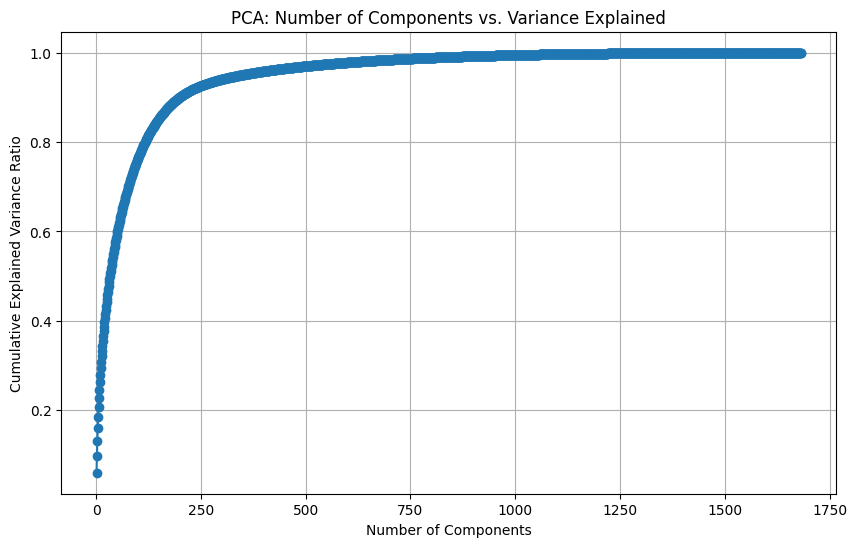

Number of components to explain 85% of variance: 148


In [7]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming embeddings_dict is already loaded from your .npy file
# Convert dictionary values to a numpy array
embeddings = np.array(list(embeddings_dict.values()))
print(f"Embeddings array shape: {embeddings.shape}")  # Should be (n_movies, n_features)

# Standardize the embeddings (optional but recommended for PCA)
mean = np.mean(embeddings, axis=0)
std = np.std(embeddings, axis=0)
embeddings_standardized = (embeddings - mean) / std

# Perform PCA
pca = PCA()
pca.fit(embeddings_standardized)

# Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print the results
print("\nExplained Variance Ratio per Component:")
for i, ratio in enumerate(explained_variance_ratio[:10], 1):  # First 10 components
    print(f"Component {i}: {ratio:.4f}")
print("\nCumulative Explained Variance Ratio:")
for i, ratio in enumerate(cumulative_variance_ratio[:10], 1):  # First 10 components
    print(f"Components 1-{i}: {ratio:.4f}")

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Number of Components vs. Variance Explained')
plt.grid(True)
plt.show()

# Optional: Determine number of components to explain 95% of variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.85) + 1
print(f"Number of components to explain 85% of variance: {n_components_95}")